<i> <h1>Destination New England! What new Students are coming to!</h1>

<i> <h3>Top Colleges including few IVY Leagues, Great sports teams, friendly environment and what more? </h3>




<hr>

<i> <h1  >Contents</h1>
    <i> 
    <b>
<a href='#1'>1. Problem Definition</a><br>
<a href='#2'>2. Data to support this project</a><br>
<a href='#3'>3. Methodology</a><br>
<a href='#4'>4. Results</a><br>
<a href='#5'>5. Recommendations</a><br>
<a href='#6'>6. Conclusion</a>

<hr>

<a name='1'><h2>1. Business Problem</h2></a>

<b>1.1. Problem definition:</b><br>
Every year thousands of new students call New England their home for the next 4 years. Finding a new place to live for the many who opt to leave off campus, could be a bit tricky if you only rely on few web search here and there, not to mention such process is time consuming and can be costly if you land at the wrong neighborhoods. 
This project is alleviate the hard tasks and eliminate the guessing game for the thousand of students and families different city, state, and/or country moving to New England this Fall. I will cover all of New England city and town area (NECTA). NECTA is a geographic and statistical entity defined by the U.S. federal government for use in the six-state New England region of the United States. NECTAs are analogous to metropolitan statistical areas and micropolitan statistical areas and are defined using the same criteria, except that they are defined on the basis of New England towns instead of entire counties. NECTAs are classified as either metropolitan or micropolitan NECTAs. A micropolitan NECTA has an urban core with a population of at least 10,000 but less than 50,000, whereas a metropolitan NECTA has an urban core with a population of at least 50,000.

<br>

<b>1.2. Targeted audience:</b><br>
I propose a way of shortening the new students' search process by using data about the most popular venues of each area to help find their "venue profile".
Potentially there are few groups of people interested in this type of insights:
-	The some real estate companies knowing what are the requirements – venue profile of the client, this analysis will limit the search area to the preferred venues of clients, and therefore the need of real estate resources and time.
-	The New students who want to move or relocate to this NECTA.
This type of analysis can speed up the process of searching a place to live saving time and money. It will also help investors who see an opportunity to invest in apartments.


<b>1.3. Search requirements:</b><br>
Students are known to consume lot of Pizza, they love coffee shops, bugger joins and restaurants, gyms to name a few. Therefore my highlights will be focused on:
- Coffee shop
- Book store
- Restaurants
- Theater
- Pizza
- Parks


<a name='2'><h2>2. Data to support this project</h2></a>

<b>2.1. Data description</b><br>
To capture the "venue profiles" of the NECTAs, I use:<br>

<b>- Web scraping with BeautifulSoup to obtain a list of New England city and town area (NECTA).</b><br>

The Wiki page: https://en.wikipedia.org/wiki/New_England_city_and_town_area has a table with:

- List of all the NECTA,
- 2010 Population, 
- 2000 Population,
- Percent change, 
- Area density.


<b>- Nominatim from geopy.geocoders for geocoding the County names and get their coordinates.</b><br>

With Nominatim we will be able to concatenate the list of New England city and town area (NECTA) with their coordinates.
      
<b>-  Foursquare API to get all venues in the </b><br>

With Foursquare we will get the top venues that are within certain radius of each other.


<a name='3'><h2>3. Methodology</h2></a>

The methods used in this work were:
1.  Web Scraping with the BeautifulSoup library
2.  Geocoding with Nominatim from geopy.geocoders
3.  Data acquisition from Foursquare's API
4.  Feature reduction by considering most common venue categories
5.  Machine learning: k-Means clustering because it is the most simple clustering algorithm and it was capable of meeting the proposed objective

<a name='3'><h2>4. Results</h2></a>

<h4>4.1. Web scraping</h4> <b>

This is the Wikipedia page https://en.wikipedia.org/wiki/New_England_city_and_town_area that contains a list of all counties in New England.</br>

<b>4.2. First the libraries needed to execute the functions</b><br>


In [4]:
import json # library to handle JSON files

import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter

from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

from sklearn.cluster import KMeans

import folium # map rendering library
from folium import plugins

import warnings
warnings.filterwarnings("ignore")

import requests
from bs4 import BeautifulSoup as bs

The following function uses BeautifulSoup to scrape a Wikipedia page and extract the elements of its index/table of contents. It returns a list with the text for each element.<br>

In [1]:
from   bs4      import BeautifulSoup
import requests # library to handle requests

website_url = requests.get('https://en.wikipedia.org/wiki/New_England_city_and_town_area').text
soup = BeautifulSoup(website_url,'lxml')
My_table = soup.find('table',{'class':'wikitable sortable'})

In [6]:
links = My_table.findAll('a')
links

[<a href="/wiki/Boston" title="Boston">Boston</a>,
 <a href="/wiki/Cambridge,_Massachusetts" title="Cambridge, Massachusetts">Cambridge</a>,
 <a href="/wiki/Quincy,_Massachusetts" title="Quincy, Massachusetts">Quincy</a>,
 <a href="/wiki/Massachusetts" title="Massachusetts">MA</a>,
 <a href="/wiki/New_Hampshire" title="New Hampshire">NH</a>,
 <a href="/wiki/Providence,_Rhode_Island" title="Providence, Rhode Island">Providence</a>,
 <a href="/wiki/Fall_River,_Massachusetts" title="Fall River, Massachusetts">Fall River</a>,
 <a href="/wiki/Warwick,_Rhode_Island" title="Warwick, Rhode Island">Warwick</a>,
 <a href="/wiki/Rhode_Island" title="Rhode Island">RI</a>,
 <a href="/wiki/Massachusetts" title="Massachusetts">MA</a>,
 <a href="/wiki/Hartford,_Connecticut" title="Hartford, Connecticut">Hartford</a>,
 <a href="/wiki/West_Hartford,_Connecticut" title="West Hartford, Connecticut">West Hartford</a>,
 <a href="/wiki/East_Hartford,_Connecticut" title="East Hartford, Connecticut">East Hartf

Using code to extract titles from previous list and send it to a dataframe.

In [7]:
Names = []
for link in links:
    Names.append(link.get('title'))
   
#import pandas as pd
df = pd.DataFrame()
df['Names'] = Names

# Code used to remove duplicates if any
df1 = df.drop_duplicates()
df1 = df.dropna()
total_df1 = len(df1)

print('Sucessfully scraped a total of %d unique Counties.' % total_df1)
df

Sucessfully scraped a total of 65 unique Counties.


,Names
0,Boston
1,"Cambridge, Massachusetts"
2,"Quincy, Massachusetts"
3,Massachusetts
4,New Hampshire
5,"Providence, Rhode Island"
6,"Fall River, Massachusetts"
7,"Warwick, Rhode Island"
8,Rhode Island
9,Massachusetts


We sucessfully scraped the information we need.

<h4>4.2. Geocoding</h4>
Now, we need to obtain the coordinates of each county.<br>
This will be done with the geocoding feature of the Nominatim from geopy.geociders.

In [8]:
from geopy.geocoders import Nominatim
df2=df1
df2['Latitude']=''
df2['Longitude']=''

total_df2 = len(df2)



Calling geocoding for New England.

In [9]:
address = 'New England, United States'
geolocator = Nominatim()

In [10]:
for i in list(range(len(df2))):
        
    address=df2.iloc[i]['Names']+',United States'

    geolocator = Nominatim()
    location = geolocator.geocode(address)
   
    if location!= None:
        
        latitude = location.latitude
        longitude = location.longitude
        df2.ix[i,'Latitude']=location.latitude
        df2.ix[i,'Longitude']=location.longitude
       
    print('Finished Geocoding County from New England, United States ')


Dataframe with coordinates of Counties in New England.

In [11]:
df2

,Names,Latitude,Longitude
0,Boston,42.3603,-71.0583
1,"Cambridge, Massachusetts",42.3751,-71.1056
2,"Quincy, Massachusetts",42.2529,-71.0023
3,Massachusetts,42.3789,-72.0324
4,New Hampshire,43.4849,-71.6554
5,"Providence, Rhode Island",41.824,-71.4128
6,"Fall River, Massachusetts",41.7011,-71.1546
7,"Warwick, Rhode Island",41.7002,-71.4161
8,Rhode Island,41.7962,-71.5992
9,Massachusetts,42.3789,-72.0324


In [12]:
df2 = df2.drop_duplicates()

Calling geocoding for New England.

In [13]:
for i in list(range(len(df2))):
    
 #   print('Geocoding Names %3d of %3d ... ' % (i,total_df2) , end='')
    
    address=str(df2.iloc[i]['Names'])+',New England, United States'
    geolocator = Nominatim()
    location = geolocator.geocode(address)
    if location!= None:
        
        latitude = location.latitude
        longitude = location.longitude
        df2.ix[i,'Latitude']=location.latitude
        df2.ix[i,'Longitude']=location.longitude

In [13]:
print('Finished Geocoding County from New England, United States ')

Finished Geocoding County from New England, United States 


Dataframe with coordinates of towns.

In [14]:
df2=df2.dropna()

In [15]:
df2.Names

0                         Boston
1       Cambridge, Massachusetts
2          Quincy, Massachusetts
3                  Massachusetts
4                  New Hampshire
5       Providence, Rhode Island
6      Fall River, Massachusetts
7          Warwick, Rhode Island
8                   Rhode Island
10         Hartford, Connecticut
11    West Hartford, Connecticut
12    East Hartford, Connecticut
13                   Connecticut
14       Bridgeport, Connecticut
15         Stamford, Connecticut
16          Norwalk, Connecticut
18    Springfield, Massachusetts
21        New Haven, Connecticut
23      Worcester, Massachusetts
26               Portland, Maine
27         South Portland, Maine
28              Biddeford, Maine
29                         Maine
30          Norwich, Connecticut
31       New London, Connecticut
34     Barnstable, Massachusetts
36        Waterbury, Connecticut
38           Burlington, Vermont
39     South Burlington, Vermont
40                       Vermont
41     Man

<h4>4.3. Visualization of New England city and town area (NECTA) on a map</h4>

In [16]:
# Creates the basemap centered at (center_lat,center_lng) and returns a map object
# I am using the coordinates of Boston


center_lat = 42.3603
center_lng = -71.0583

was_map = folium.Map(location=[center_lat, center_lng], zoom_start=9)

# instantiate a feature group for the Counties in the dataframe
was_counties = folium.map.FeatureGroup()

# loop through the list and add each to the 23 counties 
for lat, lng, label in zip(df2.Latitude,df2.Longitude, df2.Names):
    was_counties.add_child(
        folium.features.CircleMarker(
            [lat, lng],
            radius=5, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
      )
    
# add Counties to Washington metropolitan area map
was_map.add_child(was_counties)

<h4>4.4. Getting venue information</h4>

We will get data about venues around each County (from the Washington Metropolitan area) using the Foursquare API:

<h4> Load foursquare credentials for use with API to extra neighbourhood information </h4>

In [17]:
CLIENT_ID = 'M1LRQKBSRVKYDSKZGPEXAFN4EJI5NKVRHE044Y0C1QMA2QYT' # your Foursquare ID
CLIENT_SECRET = 'MZ54XNORBJHJQ0KB1KTVP2S5DTT0BKFPAYTUSIYZTV0HUZHN' # your Foursquare Secret
VERSION = '20180604'

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

LIMIT = 9999

Your credentails:
CLIENT_ID: M1LRQKBSRVKYDSKZGPEXAFN4EJI5NKVRHE044Y0C1QMA2QYT
CLIENT_SECRET:MZ54XNORBJHJQ0KB1KTVP2S5DTT0BKFPAYTUSIYZTV0HUZHN


<h4> Function from the lab that gets the venue details</h4> 


In [18]:
def getNearbyVenues(names, latitudes, longitudes, radius=5000):
    
    venues_list=[]
    n = 1
    for name, lat, lng in zip(Names, latitudes, longitudes):
   
        print('\n''Getting venue info for neighborhood %3d of %3d... ' % (n,total_df2) , end='')
        n+=1
        
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
      
        
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Counties', 
                  'Counties Latitude', 
                  'Counties Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
            
    return(nearby_venues)

In [19]:
import time
start = time.time()
NE_venues=getNearbyVenues(names=df2['Names'],
                                   latitudes=df2['Latitude'],
                                   longitudes=df2['Longitude']
                                )

print('\n'"It took {:.2f} seconds to complete this request".format(time.time()-start))


Getting venue info for neighborhood   1 of  65... 
Getting venue info for neighborhood   2 of  65... 
Getting venue info for neighborhood   3 of  65... 
Getting venue info for neighborhood   4 of  65... 
Getting venue info for neighborhood   5 of  65... 
Getting venue info for neighborhood   6 of  65... 
Getting venue info for neighborhood   7 of  65... 
Getting venue info for neighborhood   8 of  65... 
Getting venue info for neighborhood   9 of  65... 
Getting venue info for neighborhood  10 of  65... 
Getting venue info for neighborhood  11 of  65... 
Getting venue info for neighborhood  12 of  65... 
Getting venue info for neighborhood  13 of  65... 
Getting venue info for neighborhood  14 of  65... 
Getting venue info for neighborhood  15 of  65... 
Getting venue info for neighborhood  16 of  65... 
Getting venue info for neighborhood  17 of  65... 
Getting venue info for neighborhood  18 of  65... 
Getting venue info for neighborhood  19 of  65... 
Getting venue info for neighbo

In [20]:
# Save the dataframe to avoid making too many requests to the API during development
NE_venues.to_csv( 'NE_venues.csv' )

<h4> 
Verify if there are some venues for which no category was assigned. In this case, the category field is filled with "MISSING".
</h4> 

In [21]:
print('Shape before =', NE_venues.shape )

missing_vector = NE_venues['Venue Category']=='MISSING'
print('Venues without an assigned category = %d' % missing_vector.sum() )

df_venues = NE_venues[ ~missing_vector ]

print('Shape after=', df_venues.shape)

Shape before = (3486, 7)
Venues without an assigned category = 0
Shape after= (3486, 7)


<h4> 
In case there are some venues for which no category was assigned. In this case, the category field is filled with "MISSING".
Let's drop all venues for which the category is missing.</h4> 

In [22]:
print('Shape before =', NE_venues.shape )

missing_vector = NE_venues['Venue Category']=='MISSING'
print('Venues without an assigned category = %d' % missing_vector.sum() )
NE_venues = NE_venues[ ~missing_vector ]

print('Shape after=', NE_venues.shape)

Shape before = (3486, 7)
Venues without an assigned category = 0
Shape after= (3486, 7)


<h4>4.5. How are the categories distributed among the venues?</h4>

In [23]:

df_tmp = pd.DataFrame(NE_venues['Venue Category'].value_counts())

total_categories = df_tmp.shape[0]

print('Total number of categories =', total_categories)
display(df_tmp)




Total number of categories = 287


,Venue Category
Pizza Place,178
American Restaurant,160
Italian Restaurant,110
Coffee Shop,100
Bakery,95
Sandwich Place,90
Bar,77
Donut Shop,76
Ice Cream Shop,73
Seafood Restaurant,70


<h4> There are several unique categories, but many of them have very few representative venues.</h4> 
    


In [24]:
#creating a copy for code testing purposes

NE_venues_backup = NE_venues 
NE_venues_backup.count()

Counties              3486
Counties Latitude     3486
Counties Longitude    3486
Venue                 3486
Venue Latitude        3486
Venue Longitude       3486
Venue Category        3486
dtype: int64

In [25]:
NE_venues = NE_venues_backup

print(NE_venues.shape)

total_venues=df_tmp.sum()[0]

# Calculate the percentage of "venue occupancy" for each category
df_tmp['percentage'] = (df_tmp['Venue Category']/total_venues)*100

# We'll keep only the categories for which the "venue occupancy" is > 0.5%
mask_categories = df_tmp['percentage']>0.5
df_filtered_categories = df_tmp[mask_categories]
list_kept_categories = list(df_filtered_categories.index)

# Creates a new empty dataframe
#df_new = pd.DataFrame(columns=['Venue Name','Venue Category','Latitude','Longitude','Neighborhood'])
df_new = pd.DataFrame


mask_venues = []
for category in list(NE_venues['Venue Category']):
    mask_venues.append(category in list_kept_categories)

NE_venues = NE_venues[ mask_venues ]

print(NE_venues.shape)

print('Now we are keeping %d categories.' % len(list_kept_categories))

(3486, 7)
(2374, 7)
Now we are keeping 46 categories.


<h4>Number of venues by County </h4>

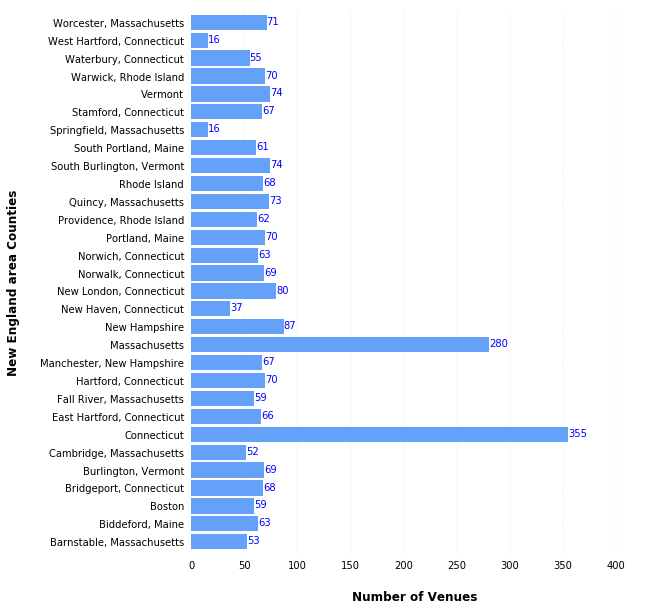

In [45]:
# Look at the number of venues by County
z = NE_venues.groupby('Counties')['Venue'].count()
ax = z.plot(kind='barh', figsize=(8, 10), color='#63a2f8', zorder=2, width=0.85)

# Despine
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Switch off ticks
ax.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

# Draw vertical axis lines
vals = ax.get_xticks()
for tick in vals:
    
   # ax.txt('Venues' + 3, i + .25, str('Venues'), color='blue', fontweight='bold')
    
    ax.axvline(x=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)
    # Set x-axis label
    ax.set_xlabel("Number of Venues", labelpad=20, weight='bold', size=12)
    # Set y-axis label
    ax.set_ylabel("New England area Counties", labelpad=20, weight='bold', size=12)
    # Format y-axis label
    ax.xaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))
        
    
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+.1, i.get_y()+.31, \
            str(round((i.get_width()), 3)), fontsize=10, color='Blue')
    

<h4> Top 10 category types </h4>

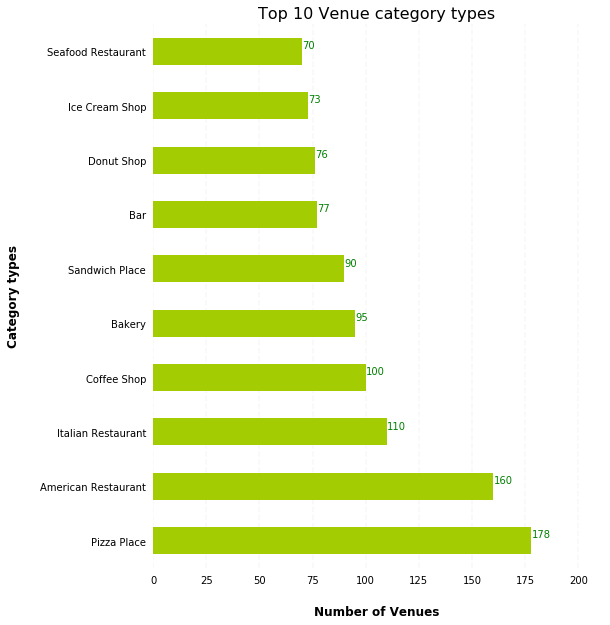

In [50]:
NE_venues['Venue Category'].value_counts()[:10]


# Look at the number of venues by County
z = NE_venues['Venue Category'].value_counts()[:10]
ax = z.plot(kind='barh', figsize=(8, 10), color='#a4cc02', zorder=2, width=0.5)

# Despine
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Switch off ticks
ax.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

plt.title('Top 10 Venue category types', fontsize=16)


# Draw vertical axis lines
vals = ax.get_xticks()
for tick in vals:
    
   # ax.txt('Venues' + 3, i + .25, str('Venues'), color='blue', fontweight='bold')
    
    ax.axvline(x=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)
    # Set x-axis label
    ax.set_xlabel("Number of Venues", labelpad=20, weight='bold', size=12)
    # Set y-axis label
    ax.set_ylabel("Category types", labelpad=20, weight='bold', size=12)
    # Format y-axis label
    ax.xaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))
        
    
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+.1, i.get_y()+.31, \
            str(round((i.get_width()), 3)), fontsize=10, color='green')


<h4> Analyze Each County
One hot encode categories and store results in a new data frame called Was_onehot </h4>

In [28]:
# one hot encoding
was_onehot = pd.get_dummies(NE_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
was_onehot['Counties'] = NE_venues['Counties']

# move neighborhood column to the first column
fixed_columns = [was_onehot.columns[-1]] + list(was_onehot.columns[:-1])
was_onehot = was_onehot[fixed_columns]

print(was_onehot.shape)
was_onehot.head()

(2374, 47)


,Counties,American Restaurant,Asian Restaurant,BBQ Joint,Bagel Shop,Bakery,Bar,Bookstore,Breakfast Spot,Brewery,Burger Joint,Café,Chinese Restaurant,Clothing Store,Coffee Shop,Convenience Store,Cosmetics Shop,Deli / Bodega,Department Store,Diner,Discount Store,Donut Shop,Fast Food Restaurant,Furniture / Home Store,Grocery Store,Gym,Gym / Fitness Center,Hotel,Ice Cream Shop,Indian Restaurant,Italian Restaurant,Japanese Restaurant,Liquor Store,Mexican Restaurant,New American Restaurant,Park,Pharmacy,Pizza Place,Pub,Restaurant,Sandwich Place,Seafood Restaurant,Steakhouse,Supermarket,Sushi Restaurant,Thai Restaurant,Theater
3,Boston,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
5,Boston,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
6,Boston,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
10,Boston,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
12,Boston,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [29]:
print('Shape of the original venues dataframe =', df_venues.shape)


# Creates a new dataframe with the one-hot encoding columns
df_onehot = pd.get_dummies(NE_venues['Venue Category'])

# Adds a column with the name of the neighborhood for each venue
df_onehot['Neighborhood'] = NE_venues['Counties']

print('Shape of the one-hot encoding dataframe =', df_onehot.shape)

# Builds a new dataframe with the number of occurrences of each category for each county
# Here the zeros and ones of the one-hot encoding act as counters.
df_count = df_onehot.groupby('Neighborhood').sum()

# Adds a column with the total number of venues for each neighborhood
df_count['Total'] = df_count.sum(axis=1)

print('Shape of the counting dataframe =', df_count.shape)


# Builds a new dataframe with the frequency, in %, of each venue for each neighborhood
df_freq = df_count.copy()

for column in df_freq.columns:
    df_freq[column] = (df_freq[column]/df_freq['Total'])*100

df_freq.drop('Total', axis=1, inplace=True)

print('Shape of the frequency dataframe =', df_freq.shape)

Shape of the original venues dataframe = (3486, 7)
Shape of the one-hot encoding dataframe = (2374, 47)
Shape of the counting dataframe = (30, 47)
Shape of the frequency dataframe = (30, 46)


Now we have a dataframe with all information we need to proceed to the clustering step.

<h3>4.6. Clustering</h3>
Now we will use k-Means clustering in order to find "venue profiles" for the New England city and town area (NECTA).<br>
First let's find the optimum value for k, which is the number of clusters.

In [30]:
k = 9
kmeans = KMeans(n_clusters=k, random_state=0).fit(df_freq)

In [31]:
# Creating a new dataframe with the neighborhood names
df_clust = pd.DataFrame(df_freq.index.values)
df_clust.columns = ['Neighborhood']

# Adding the cluster ID as a column of the dataframe
df_clust['Cluster'] = kmeans.labels_

display(df_clust.head(8))
print(df_clust.shape)

,Neighborhood,Cluster
0,"Barnstable, Massachusetts",2
1,"Biddeford, Maine",0
2,Boston,0
3,"Bridgeport, Connecticut",4
4,"Burlington, Vermont",6
5,"Cambridge, Massachusetts",8
6,Connecticut,6
7,"East Hartford, Connecticut",6


(30, 2)


Sorting datafram with counties and coordinates

In [32]:

df2.sort_values('Names', inplace=True, ascending=True)
df2

,Names,Latitude,Longitude
58,"Auburn, Maine",44.0979,-70.2312
55,"Bangor, Maine",44.8012,-68.7778
34,"Barnstable, Massachusetts",41.7001,-70.2995
28,"Biddeford, Maine",43.4926,-70.4534
0,Boston,42.3603,-71.0583
14,"Bridgeport, Connecticut",41.167,-73.2048
38,"Burlington, Vermont",44.4763,-73.2135
1,"Cambridge, Massachusetts",42.3751,-71.1056
13,Connecticut,41.65,-72.7342
45,"Danbury, Connecticut",41.3948,-73.454


In [33]:
df_clust

,Neighborhood,Cluster
0,"Barnstable, Massachusetts",2
1,"Biddeford, Maine",0
2,Boston,0
3,"Bridgeport, Connecticut",4
4,"Burlington, Vermont",6
5,"Cambridge, Massachusetts",8
6,Connecticut,6
7,"East Hartford, Connecticut",6
8,"Fall River, Massachusetts",6
9,"Hartford, Connecticut",6


Merging original file with Cluster classification

In [34]:
df.apply(lambda col: col.drop_duplicates().reset_index(drop=True))

,Names
0,Boston
1,"Cambridge, Massachusetts"
2,"Quincy, Massachusetts"
3,Massachusetts
4,New Hampshire
5,"Providence, Rhode Island"
6,"Fall River, Massachusetts"
7,"Warwick, Rhode Island"
8,Rhode Island
9,"Hartford, Connecticut"


In [35]:

pd.Series(kmeans.labels_).value_counts()


df2_merged = df2

# add clustering labels
df2_merged['Cluster'] = kmeans.labels_[0]
df2_merged.head()


df2_merged.head() # check the last columns!


,Names,Latitude,Longitude,Cluster
58,"Auburn, Maine",44.0979,-70.2312,2
55,"Bangor, Maine",44.8012,-68.7778,2
34,"Barnstable, Massachusetts",41.7001,-70.2995,2
28,"Biddeford, Maine",43.4926,-70.4534,2
0,Boston,42.3603,-71.0583,2


In [36]:
df2

,Names,Latitude,Longitude,Cluster
58,"Auburn, Maine",44.0979,-70.2312,2
55,"Bangor, Maine",44.8012,-68.7778,2
34,"Barnstable, Massachusetts",41.7001,-70.2995,2
28,"Biddeford, Maine",43.4926,-70.4534,2
0,Boston,42.3603,-71.0583,2
14,"Bridgeport, Connecticut",41.167,-73.2048,2
38,"Burlington, Vermont",44.4763,-73.2135,2
1,"Cambridge, Massachusetts",42.3751,-71.1056,2
13,Connecticut,41.65,-72.7342,2
45,"Danbury, Connecticut",41.3948,-73.454,2


In [37]:
# Creates the basemap centered at (lat,lng) and returns a map object
center_lat = 41.65
center_lng = -72.7342

def map_define( center_lat , center_lng , zoom=9):
    map_rp_fig = folium.Figure(width=1000,height=800)
    map_rp = folium.Map( location=[center_lat,center_lng], zoom_start=zoom, tiles="OpenStreetMap")
    map_rp.add_to(map_rp_fig)
    
    return map_rp


# Adds circular markers to a map object (folium_map). The locations and labels are taken from lists
def map_markers( folium_map , lat_list , lng_list , label_list , color , radius ):
    for lat,lng,label in zip(lat_list,lng_list,label_list):
        folium.features.CircleMarker(location=[lat,lng],
                                     popup=str(label.replace('\'','_').replace('\\','_').replace('/','_').replace(':','_')),
                                     color=color,
                                     fill=True,
                                     fill_color=color,
                                     fill_opacity=0.75,
                                     radius=radius).add_to(folium_map)
    return folium_map



<h3> Sorting file by County name and Cluster number </h3>

In [38]:
#df2_merged.sort_values('Names', inplace=True, ascending=True)
df2_merged = df2_merged.sort_values(['Cluster','Names'], ascending=[True,True])

df2_merged

,Names,Latitude,Longitude,Cluster
58,"Auburn, Maine",44.0979,-70.2312,2
55,"Bangor, Maine",44.8012,-68.7778,2
34,"Barnstable, Massachusetts",41.7001,-70.2995,2
28,"Biddeford, Maine",43.4926,-70.4534,2
0,Boston,42.3603,-71.0583,2
14,"Bridgeport, Connecticut",41.167,-73.2048,2
38,"Burlington, Vermont",44.4763,-73.2135,2
1,"Cambridge, Massachusetts",42.3751,-71.1056,2
13,Connecticut,41.65,-72.7342,2
45,"Danbury, Connecticut",41.3948,-73.454,2


<h3> 4.7. Mapping counties with cluster color classification </h3>

In [39]:
import numpy             as np
import matplotlib.cm     as cm
import matplotlib.colors as colors

lat_rp = 41.65
lon_rp = -72.7342

map_clusters = map_define( lat_rp , lon_rp )

colors_array = cm.rainbow(np.linspace(0, 1, k))
rainbow = [colors.rgb2hex(i) for i in colors_array]

for cl in range(0,k):
    
    tmp = df2_merged[ df2_merged['Cluster']==cl ]
    map_clusters = map_markers( map_clusters , tmp['Latitude'] , tmp['Longitude'] , [str(cl)]*tmp.shape[0], rainbow[cl] , 6 )
    

map_clusters



<h3> How are these clusters populated? </h3>

In [40]:
df_clust_sizes = pd.DataFrame(df_clust['Cluster'].value_counts())
df_clust_sizes.index.name = 'Cluster ID'
df_clust_sizes.columns = ['Count']
df_clust_sizes['Percentage'] = np.round((df_clust_sizes['Count']/df_clust_sizes['Count'].sum())*100 , 1)

display(df_clust_sizes)

,Count,Percentage
Cluster ID,,
6,10,33.3
0,5,16.7
2,4,13.3
4,3,10.0
7,2,6.7
3,2,6.7
1,2,6.7
8,1,3.3
5,1,3.3


<h3> 4.8. How are the clusters different in terms of venue categories?  </h3>

In [41]:
def normalize_column(df,column):
    return df[column]/df[column].sum()

for cluster in range(0,k):

    postcodes_cluster = df_clust[df_clust['Cluster']==cluster]['Neighborhood'].unique()
    
    cluster_size = len( df_clust[df_clust['Cluster']==cluster]['Neighborhood'] )
    cluster_size_perc = np.round( (cluster_size / df_clust['Cluster'].count())*100 , 1 )
    
    print('Profile of cluster with ID={}:'.format(cluster))
    print('  It has {} members ({}% of total venues)'.format( cluster_size,cluster_size_perc))
    
    tmp  = pd.DataFrame()
    tmp2 = pd.DataFrame()

    for postcode in postcodes_cluster:
        tmp[postcode]=df_freq.loc[postcode,]
    tmp2 = pd.DataFrame(tmp.transpose().mean().sort_values(ascending=False).head(10))
    tmp2.reset_index(inplace=True)
    tmp2.columns=['Venue Category','Venue Mean Frequency']    tmp2['Venue Frequency in top-10'] = np.round(normalize_column(tmp2,'Venue Mean Frequency')*100,1)
    display(tmp2)

Profile of cluster with ID=0:
  It has 5 members (16.7% of total venues)


,Venue Category,Venue Mean Frequency,Venue Frequency in top-10
0,Coffee Shop,6.750512,13.2
1,Bakery,5.787722,11.3
2,Pizza Place,5.424646,10.6
3,Café,5.392715,10.5
4,American Restaurant,5.371898,10.5
5,Park,5.242297,10.2
6,Brewery,5.096072,9.9
7,Breakfast Spot,4.173758,8.1
8,Hotel,4.155511,8.1
9,Italian Restaurant,3.857003,7.5


Profile of cluster with ID=1:
  It has 2 members (6.7% of total venues)


,Venue Category,Venue Mean Frequency,Venue Frequency in top-10
0,Fast Food Restaurant,31.25,31.2
1,Discount Store,18.75,18.8
2,Pizza Place,6.25,6.2
3,Grocery Store,6.25,6.2
4,Hotel,6.25,6.2
5,Italian Restaurant,6.25,6.2
6,Diner,6.25,6.2
7,Pharmacy,6.25,6.2
8,Mexican Restaurant,6.25,6.2
9,BBQ Joint,6.25,6.2


Profile of cluster with ID=2:
  It has 4 members (13.3% of total venues)


,Venue Category,Venue Mean Frequency,Venue Frequency in top-10
0,American Restaurant,8.221167,16.6
1,Donut Shop,6.573545,13.2
2,Pizza Place,5.650388,11.4
3,Italian Restaurant,5.119704,10.3
4,Coffee Shop,4.764175,9.6
5,Sandwich Place,4.087022,8.2
6,Breakfast Spot,4.058336,8.2
7,Fast Food Restaurant,4.039829,8.1
8,Bar,3.616937,7.3
9,Bakery,3.517591,7.1


Profile of cluster with ID=3:
  It has 2 members (6.7% of total venues)


,Venue Category,Venue Mean Frequency,Venue Frequency in top-10
0,Donut Shop,9.692513,17.2
1,Pizza Place,8.783422,15.5
2,Coffee Shop,6.403743,11.3
3,Pharmacy,6.403743,11.3
4,American Restaurant,6.229947,11.0
5,Convenience Store,5.842246,10.3
6,Bar,3.288770,5.8
7,Asian Restaurant,3.288770,5.8
8,Ice Cream Shop,3.288770,5.8
9,Sandwich Place,3.288770,5.8


Profile of cluster with ID=4:
  It has 3 members (10.0% of total venues)


,Venue Category,Venue Mean Frequency,Venue Frequency in top-10
0,Italian Restaurant,11.675864,23.2
1,Pizza Place,9.259584,18.4
2,Deli / Bodega,4.406330,8.8
3,American Restaurant,4.356369,8.7
4,Sandwich Place,3.901501,7.8
5,Mexican Restaurant,3.467954,6.9
6,Donut Shop,3.425310,6.8
7,Bakery,3.411305,6.8
8,Park,3.396672,6.8
9,Ice Cream Shop,2.956436,5.9


Profile of cluster with ID=5:
  It has 1 members (3.3% of total venues)


,Venue Category,Venue Mean Frequency,Venue Frequency in top-10
0,Bar,14.516129,20.0
1,Café,11.290323,15.6
2,New American Restaurant,8.064516,11.1
3,Coffee Shop,8.064516,11.1
4,Italian Restaurant,8.064516,11.1
5,Restaurant,6.451613,8.9
6,American Restaurant,4.838710,6.7
7,Pizza Place,4.838710,6.7
8,Asian Restaurant,3.225806,4.4
9,Bakery,3.225806,4.4


Profile of cluster with ID=6:
  It has 10 members (33.3% of total venues)


,Venue Category,Venue Mean Frequency,Venue Frequency in top-10
0,Pizza Place,8.635783,18.9
1,American Restaurant,8.627573,18.9
2,Sandwich Place,4.753187,10.4
3,Pharmacy,3.876381,8.5
4,Bakery,3.678704,8.1
5,Italian Restaurant,3.615008,7.9
6,Ice Cream Shop,3.324730,7.3
7,Donut Shop,3.060439,6.7
8,Coffee Shop,3.046263,6.7
9,Mexican Restaurant,2.998403,6.6


Profile of cluster with ID=7:
  It has 2 members (6.7% of total venues)


,Venue Category,Venue Mean Frequency,Venue Frequency in top-10
0,Pizza Place,7.174658,12.8
1,Seafood Restaurant,7.174658,12.8
2,American Restaurant,6.549658,11.6
3,Chinese Restaurant,6.549658,11.6
4,Bar,5.864726,10.4
5,Diner,5.804795,10.3
6,Breakfast Spot,5.239726,9.3
7,Coffee Shop,4.049658,7.2
8,Bakery,3.929795,7.0
9,Italian Restaurant,3.929795,7.0


Profile of cluster with ID=8:
  It has 1 members (3.3% of total venues)


,Venue Category,Venue Mean Frequency,Venue Frequency in top-10
0,Bakery,15.384615,22.2
1,Café,9.615385,13.9
2,Pizza Place,7.692308,11.1
3,Bookstore,5.769231,8.3
4,Brewery,5.769231,8.3
5,Sandwich Place,5.769231,8.3
6,Park,5.769231,8.3
7,New American Restaurant,5.769231,8.3
8,Theater,3.846154,5.6
9,Mexican Restaurant,3.846154,5.6


And there we have it! We successfully clustered the New England city and town area (NECTA) into 8 clusters with distinct "venue profiles".<br>
Now let's analyze these results.

<a name='5'><h2>5. Discussion</h2></a>

The objective of this analysis was to shorten the search process of finding a place to live in New England by  analyzing the most popular "venue profiles" for clusters of counties

The ten most common venue categories of each cluster that we identified are enough to reveal differences between them and allow students to imagine which "client profile" fits best <br>
based on venues like:
- Coffee shop
- Book store
- Restaurants
- Theater
- Pizza
- Parks

Cluster venues and matches based on the venues above.


1. Cluster 0 - Has about 17% of the desired venues above <br>
2. Cluster 1 - Has about 7% of the desired venues above
3. Cluster 2 - Has about 13% of the desired venues above
4. Cluster 3 - Has about 7% of the desired venues above
5. Cluster 4 - Has about 10% of the desired venues above
6. Cluster 5 - Has about 3% of the desired venues above
7. Cluster 6 - Has about 33% of the desired venues above
8. Cluster 7 - Has about 7% of the desired venues above
9. Cluster 8 - Has about 3% of the desired venues above

Cluster 6 is the strongest with about 33% of the prime venues



<a name='6'><h2>6. Conclusion</h2></a>

The analysis showed here, albeit simple, successfully identified 9 clusters of counties in New England with different venues profiles that can be mapped to different students wishes. 

The cluster that best matches our targeted "venue requirements" is cluster 6 with 33%. we can set new desirable venues and cluster based on them. 



Many enhancements to this analysis can be done to help students pick an ideal area to live:
- How close is the NECTA to the college
- What are the types of public transportation exist between the NECTAs
- College ranking and locations and admission rate.



<hr>